In [1]:
import matplotlib.pyplot as plt

import json

In [2]:
metrics = json.load(open("../data/metrics_overview.json"))

scenes = list(metrics.keys())
print(f"Loaded {len(scenes)} scenes")

Loaded 3 scenes


In [3]:
metrics["0229"][0].keys()

dict_keys(['n_reg_images', 'mean_reprojection_error', 'n_observations', 'mean_obs_per_reg_image', 'mean_track_length', 'n_images', 'perc_reg_images', 'mean_overlap', 'scene', 'model_name', 'retrieval', 'n_retrieval_matches', 'features', 'matcher', 'overlap_fn'])

In [4]:
metrics["0229"][1]["model_name"] = "colmap-sequential"
metrics["0229"][0]["model_name"] = "colmap-exhaustive"

In [5]:
metrics["0229"]

[{'n_reg_images': 635,
  'mean_reprojection_error': 0.8816267631944762,
  'n_observations': 536441,
  'mean_obs_per_reg_image': 844.7889763779527,
  'mean_track_length': 6.550351059283228,
  'n_images': 821,
  'perc_reg_images': 77.34470158343484,
  'mean_overlap': 0.03412866983273907,
  'scene': '0229',
  'model_name': 'colmap-exhaustive',
  'retrieval': 'netvlad',
  'n_retrieval_matches': 50,
  'features': 'sift',
  'matcher': 'NN-ratio',
  'overlap_fn': 'sparse-overlap-2023-03-27_03-14-02.npy'},
 {'n_reg_images': 245,
  'mean_reprojection_error': 0.6796060600096258,
  'n_observations': 57874,
  'mean_obs_per_reg_image': 236.22040816326532,
  'mean_track_length': 4.905823514452827,
  'n_images': 821,
  'perc_reg_images': 29.84165651644336,
  'mean_overlap': 0.17947878493773758,
  'scene': '0229',
  'model_name': 'colmap-sequential',
  'retrieval': 'netvlad',
  'n_retrieval_matches': 50,
  'features': 'sift',
  'matcher': 'NN-ratio',
  'overlap_fn': 'sparse-overlap-2023-03-26_19-03-19

In [22]:
def plot_metric(metrics, scene):
    keys = [
        "n_reg_images", 
        "perc_reg_images", 
        "mean_reprojection_error", 
        "n_observations", 
        "mean_obs_per_reg_image", 
        "mean_track_length",
        "mean_overlap"
    ]
    
    labels = []
    for m in metrics[scene]:
        if "model_name" in m.keys():
            labels.append(m["model_name"])
        else:
            labels.append(f"{m['features']}-{m['matcher']}")

    fig, ax = plt.subplots(3, 3, figsize=(20, 20))
    
    for i, metric in enumerate(keys):
        values = [m[metric] for m in metrics[scene]]
        ax[i // 3, i % 3].bar(labels, values, alpha=0.5)

        
        # rotate labels
        for tick in ax[i // 3, i % 3].get_xticklabels():
            tick.set_rotation(20)
        
        ax[i // 3, i % 3].set_title(metric)
        
    
    plt.suptitle(f"Scene {scene}-sparse")
    plt.show()

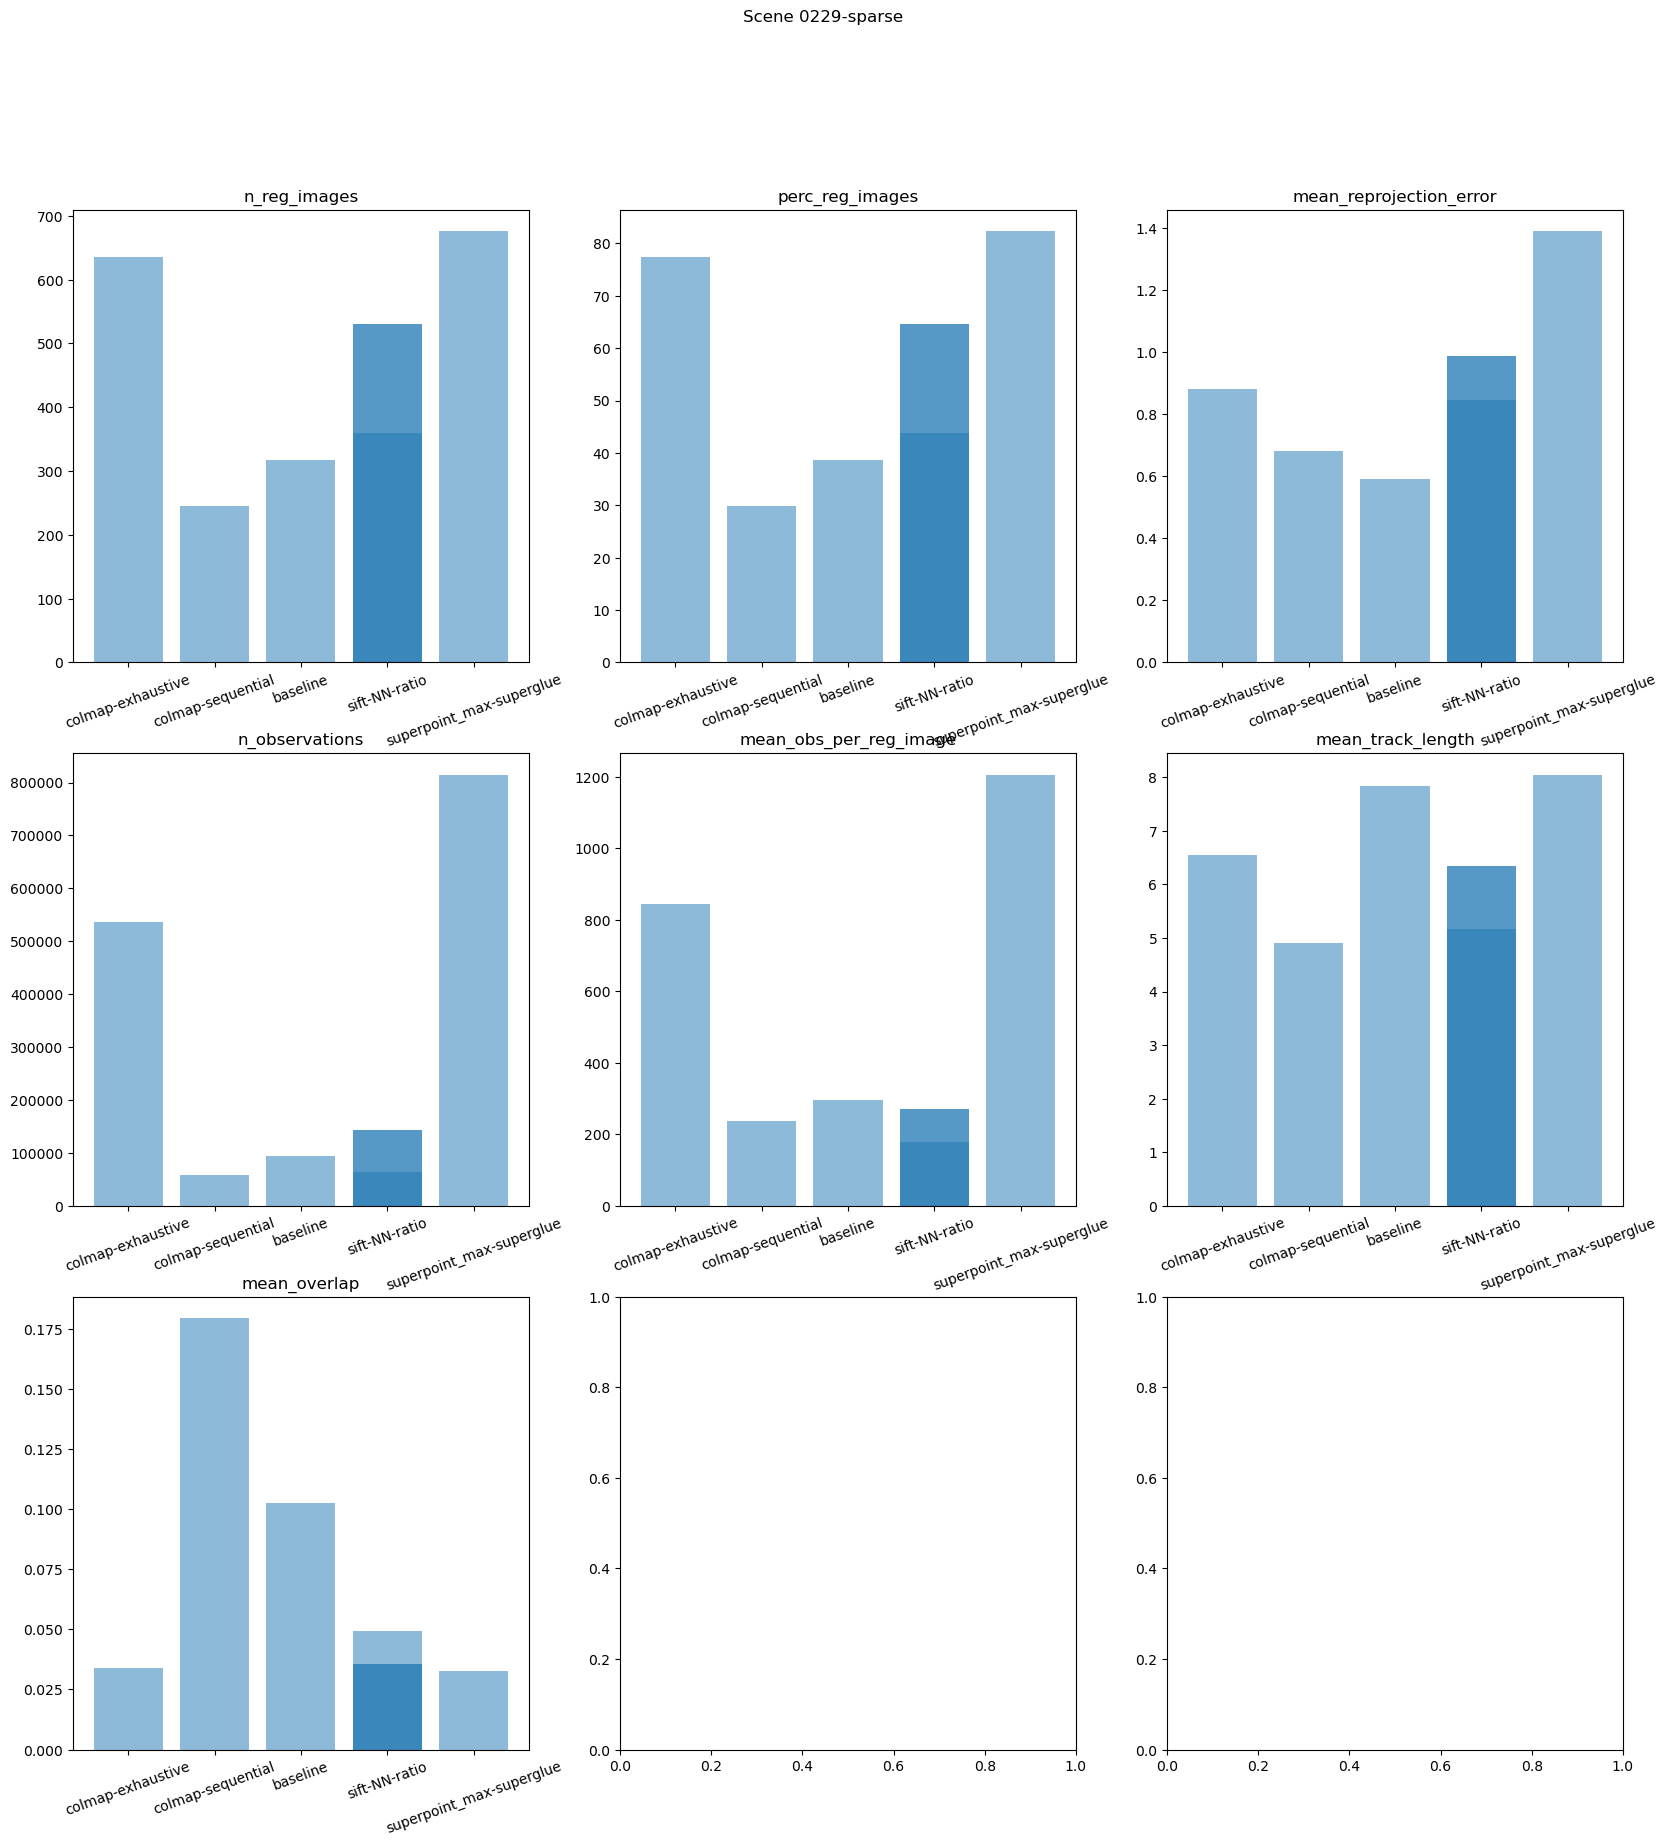

In [23]:
scene = "0229"
plot_metric(metrics, scene)

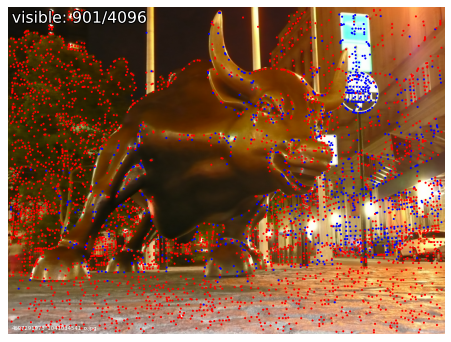

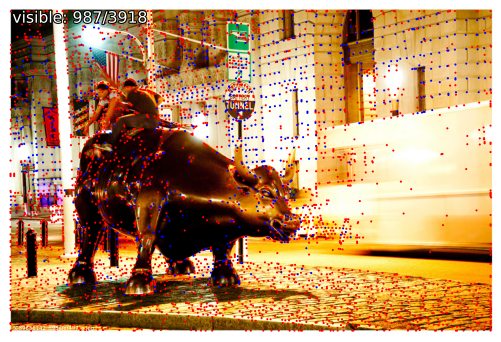

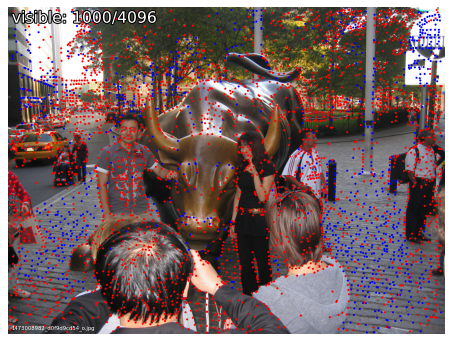

In [8]:
import os
from pathlib import Path

import pycolmap
from hloc import visualization

model = pycolmap.Reconstruction(Path(os.path.join("../data", scene, "sparse", "superpoint_max-superglue")))
images = Path(os.path.join("../data", scene, "images"))

visualization.visualize_sfm_2d(model, images, color_by='visibility', n=3)

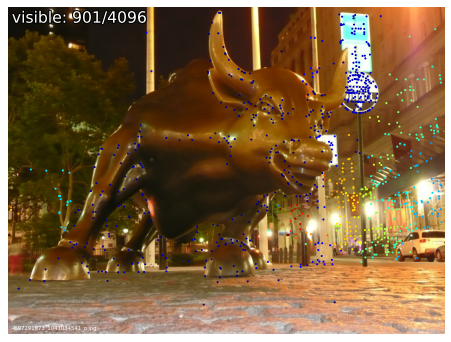

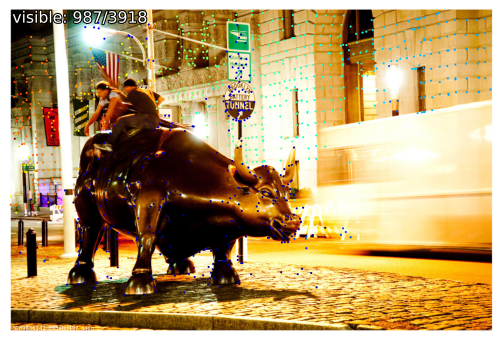

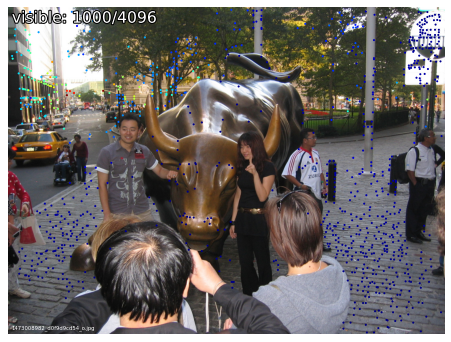

In [9]:
visualization.visualize_sfm_2d(model, images, color_by='depth', n=3)

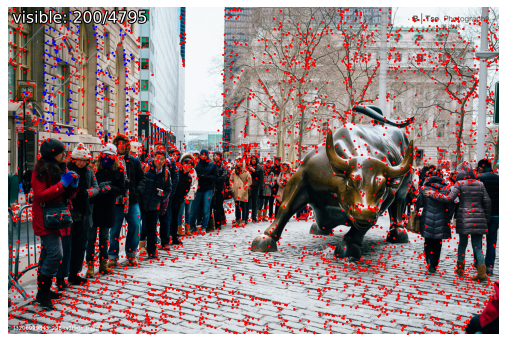

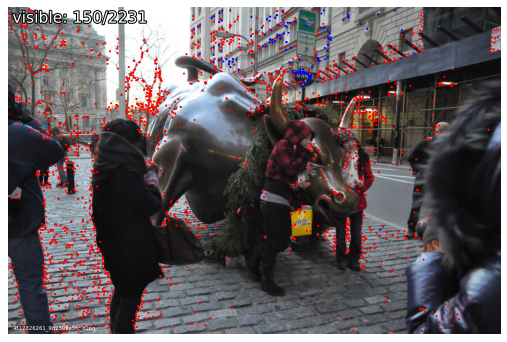

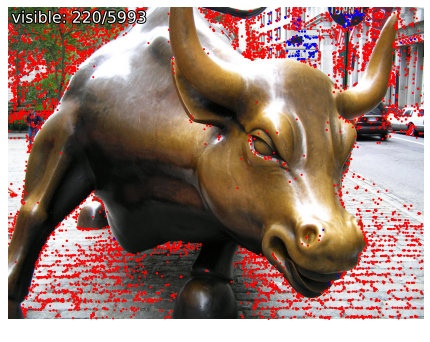

In [10]:
model = pycolmap.Reconstruction(Path(os.path.join("../data", scene, "sparse", "baseline")))
images = Path(os.path.join("../data", scene, "images"))

visualization.visualize_sfm_2d(model, images, color_by='visibility', n=3)

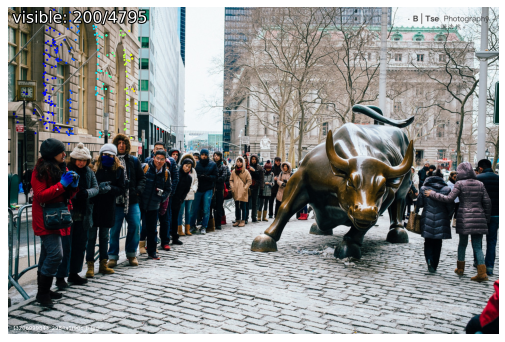

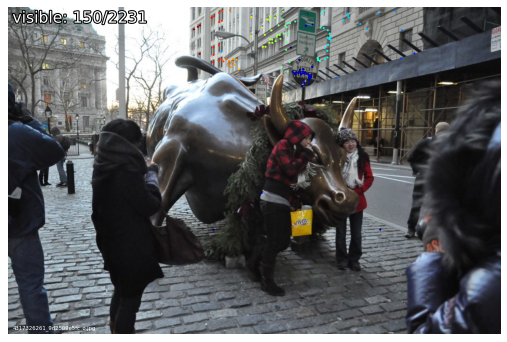

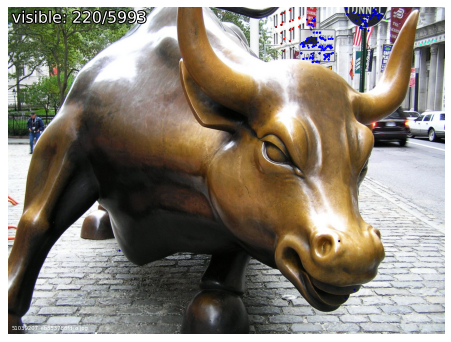

In [11]:
visualization.visualize_sfm_2d(model, images, color_by='depth', n=3)